# Debugging whether or not the simulation includes the rear blocker
## @Milo
## January, 2018

#### The already "inclusion" of the Front blocker might be an effect of the way as the rays are generated since they are randomly created using the pupil af the FOXSI module as a key parameter (cross-section). The pupil already includes the front blocker. The rear blocker is removed in lines 105 and 106 of module.py

# Creating Rays

In [42]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
Sdist = -1.5e13         ## cm
offaxisAngle = 0.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(radii = [3.17], core_radius=(3.17,0.))
n = 100
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)
Rrays = [ray for ray in rays if (ray.tag != 'Source')] #kills the passthrough rays
from foxsisim.util import save_rays, load_rays
save_rays(Rrays,filename='../../../../Desktop/30rays_test.csv')
print(len(Rrays),' rays saved')
print('Done!')

Rays saved in file : ../../../../Desktop/30rays_test.csv
100  rays saved
Done!


### Testing the most inner Wolter-I of a 10-shell FOXSI module

### Using the modified version of FOXSISIM in branch pymilo/Random-Source-Debugging on February 2, 2018

Now, that we can introduce in the code the size of both the front and rear blocker, I want to test for an On-axis source at 1AU what happen for different size of front blocker and then for the rear blocker.

 # Optimizing FRONT Blocker size for NO Rear blocker

In [74]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
from foxsisim.util import load_rays, save_rays

Sdist = -1.5e13         ## cm
offaxisAngle = 0.0     ## arcmin
n = 100
fbrs = np.arange(2.623,3.29,0.05) # Front blocker radius ranging from 2.623 cm to 3.273
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])

for fbr in fbrs:
    print('Front radius: %f' % fbr)
    module = Module(radii = [3.17], core_radius=(fbr,0.))
    rays = source.generateRays(module.targetFront,n)
    module.passRays(rays)
    Rrays = [ray for ray in rays if (ray.tag != 'Source')] #kills the passthrough rays
    save_rays(Rrays,filename='../../../../Desktop/rays_FB/rays_FBR_=_'+str(fbr)+'.csv')

Front radius: 2.623000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_2.623.csv
Front radius: 2.673000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_2.673.csv
Front radius: 2.723000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_2.723.csv
Front radius: 2.773000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_2.773.csv
Front radius: 2.823000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_2.823.csv
Front radius: 2.873000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_2.873.csv
Front radius: 2.923000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_2.923.csv
Front radius: 2.973000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_2.973.csv
Front radius: 3.023000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_3.023.csv
Front radius: 3.073000
Rays saved in file : ../../../../Desktop/rays_FB/rays_FBR_=_3.073.csv
Front radius: 3.123000
Rays saved in file : ../../../../Desktop/rays_F

In [67]:
fbr = np.arange(2.623,3.29,0.05)
fbr

array([ 2.623,  2.673,  2.723,  2.773,  2.823,  2.873,  2.923,  2.973,
        3.023,  3.073,  3.123,  3.173,  3.223,  3.273])

In [69]:
str(fbr[0])

'2.623'

In [39]:
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/30rays_test.csv')
print('Number of rays : {:d}'.format(len(Brays)))

# Create detector:
from foxsisim.detector import Detector
detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
detector.catchRays(Brays)

Rays from /Users/Kamilobu/Desktop/30rays_test.csv loaded.
Number of rays : 100


In [40]:
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 1.0    # 1cm = 17.4 arcmin
sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
    

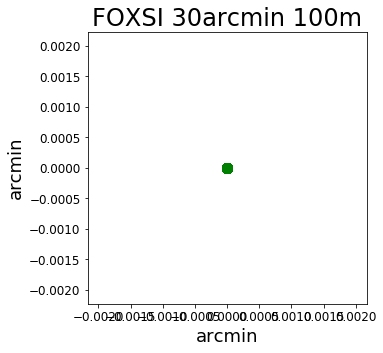

In [41]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(5,5))
plt.title('FOXSI 30arcmin 100m',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(Hx,Hy,color='red',s=100.,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=100.,alpha=0.8)
plt.scatter(Dx,Dy,color='green',s=100.,alpha=0.8)
#plt.ylim(-2.5,0.5)
#plt.xlim(-2.,2.)
plt.show()

In [31]:
print('Initial rays: {:d} '.format(len(Brays)))
print('Number of Double rays: {:d} '.format(len(Drays)))
print('Number of Hyperb rays: {:d} '.format(len(Hrays)))
print('Number of Parabo rays: {:d} '.format(len(Prays)))

Initial rays: 10 
Number of Double rays: 5 
Number of Hyperb rays: 5 
Number of Parabo rays: 0 
